In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
import pickle
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, LeakyReLU, BatchNormalization, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import load_model

import numpy as np
from PIL import Image
import os 
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.python.client import device_lib

from sklearn.cluster import KMeans
from skimage.color import rgb2hed
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
import cv2
import pickle
from tensorflow.keras.models import Sequential
from numpy.linalg import norm

In [4]:
new_train_x = []
open_file = open("/content/drive/MyDrive/train_x.pkl", "rb")
new_train_x = pickle.load(open_file)
open_file.close()

new_train_y = []
open_file = open("/content/drive/MyDrive/train_y.pkl", "rb")
new_train_y = pickle.load(open_file)
open_file.close()

In [5]:
new_train_y[1].shape

(128, 128, 3)

In [8]:
x_train = np.asarray(new_train_x)
x_train = x_train.astype('float32') / 255.
y_train = np.asarray(new_train_y)
y_train = x_train.astype('float32') / 255.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# test = np.asarray([new_train_x[1]])
# test = test.astype('float32') / 255.

In [6]:
n_epochs = 35
batch_size =32
optimizer = 'adam'
loss = 'mean_squared_error'

feature_model = Sequential()
feature_model.add(Input(shape=(128,128, 3)))
feature_model.add(Conv2D(filters=16, kernel_size=(3,3),strides=1, padding='same'))
feature_model.add(LeakyReLU())
feature_model.add(Conv2D(filters=32, kernel_size=(3,3),strides=1, padding='same'))
feature_model.add(LeakyReLU())
feature_model.add(BatchNormalization()) 
feature_model.add(Conv2D(filters=64, kernel_size=(3,3),strides=2, padding='same'))
feature_model.add(LeakyReLU())
feature_model.add(BatchNormalization())
feature_model.add(MaxPooling2D())
feature_model.add(Conv2D(filters=128, kernel_size=(3,3),strides=2, padding='same'))
feature_model.add(LeakyReLU())
feature_model.add(BatchNormalization())
feature_model.add(MaxPooling2D())
feature_model.add(Conv2D(filters=64, kernel_size=(3,3),strides=1, padding='same'))
feature_model.add(LeakyReLU())
feature_model.add(BatchNormalization())
feature_model.add(Conv2D(filters=32, kernel_size=(3,3),strides=1, padding='same'))
feature_model.add(LeakyReLU())
feature_model.add(Conv2D(filters=16, kernel_size=(3,3),strides=1, padding='same'))
feature_model.add(LeakyReLU())
feature_model.add(Conv2D(filters=8, kernel_size=(3,3),strides=1, padding='same',name="Feature_Layer"))
feature_model.add(LeakyReLU())

#Dense Layers
feature_model.add(tf.keras.layers.Dense(64, activation='relu'))
feature_model.add(tf.keras.layers.Dense(64, activation='relu'))
feature_model.add(tf.keras.layers.Dense(64, activation='relu'))
feature_model.add(tf.keras.layers.Dense(64, activation='relu'))
feature_model.add(tf.keras.layers.Dense(32, activation='relu'))
feature_model.add(tf.keras.layers.Dense(32, activation='relu'))
feature_model.add(tf.keras.layers.Dense(32, activation='relu'))
feature_model.add(tf.keras.layers.Dense(32, activation='relu'))
feature_model.add(tf.keras.layers.Dense(16, activation='relu'))
feature_model.add(tf.keras.layers.Dense(16, activation='relu'))
feature_model.add(tf.keras.layers.Dense(8, activation='relu'))
feature_model.add(tf.keras.layers.Dense(8, activation='relu'))

#bottle Neck
feature_model.add(Conv2D(filters=16, kernel_size=(1,1),strides=1, padding='same'))
feature_model.add(LeakyReLU())
feature_model.add(Conv2D(filters=32, kernel_size=(1,1),strides=1, padding='same'))
feature_model.add(LeakyReLU())
feature_model.add(Conv2D(filters=64, kernel_size=(3,3),strides=1, padding='same'))
feature_model.add(LeakyReLU())
feature_model.add(BatchNormalization())


#Decoding
feature_model.add(UpSampling2D())
feature_model.add(Conv2DTranspose(filters=128, kernel_size=(3,3),strides=2, padding='same'))
feature_model.add(LeakyReLU())
feature_model.add(BatchNormalization())
feature_model.add(UpSampling2D())
feature_model.add(Conv2DTranspose(filters=64, kernel_size=(3,3),strides=2, padding='same'))
feature_model.add(LeakyReLU())
feature_model.add(BatchNormalization())
feature_model.add(Conv2D(filters=32, kernel_size=(3,3),strides=1, padding='same'))
feature_model.add(LeakyReLU())
feature_model.add(BatchNormalization())
feature_model.add(Conv2D(filters=16, kernel_size=(3,3),strides=1, padding='same'))
feature_model.add(LeakyReLU())
feature_model.add(Conv2D(filters=3, kernel_size=(3,3),strides=1, padding='same'))
feature_model.add(LeakyReLU())

feature_model.compile(optimizer=optimizer , loss=loss, metrics=['Accuracy'])

filepath = "/February_epochs{}_batch{}_{}.h5".format(n_epochs,batch_size,optimizer)
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
ES = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=0, mode='min', restore_best_weights=True)
callbacks_list = [checkpoint, ES]


feature_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128, 128, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 128, 128, 32)      0         
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                        

In [9]:
feature_train = feature_model.fit(x_train, y_train,
                                        epochs=n_epochs,
                                        batch_size=batch_size,
                                        shuffle=True,
                                        validation_split = 0.2,
                                       )

Epoch 1/35


ValueError: ignored

In [ ]:
predict = feature_model.predict(test)

NameError: ignored

In [ ]:
predict

array([[[[ 0.0244972 , -0.00333772, -0.00197966],
         [-0.01018964,  0.00557447, -0.000623  ],
         [ 0.0107387 , -0.00628428,  0.00265616],
         ...,
         [-0.00677997,  0.01477041, -0.00296116],
         [-0.01009618, -0.01513305,  0.02069549],
         [-0.00844904,  0.02002294, -0.00200872]],

        [[-0.00830553, -0.02661194,  0.03514256],
         [-0.00385423,  0.01623131,  0.04318615],
         [-0.00959133, -0.00804023,  0.0030874 ],
         ...,
         [-0.00442304,  0.01812042, -0.00298699],
         [-0.00168859, -0.00995684, -0.01295712],
         [-0.00825369,  0.03189822, -0.0297327 ]],

        [[-0.00279335, -0.00821573, -0.00108589],
         [-0.00567124, -0.01209612, -0.00861331],
         [ 0.0022864 , -0.0077578 , -0.01414431],
         ...,
         [-0.00151277,  0.0106208 ,  0.00247655],
         [ 0.00765577, -0.02614049, -0.00701805],
         [-0.00702269,  0.03538471, -0.01284173]],

        ...,

        [[-0.00404251, -0.00794496, -0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


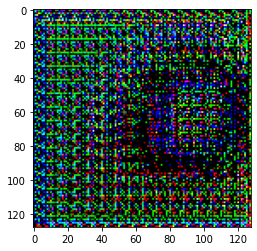

In [ ]:
plt.imshow(predict[0]*255)

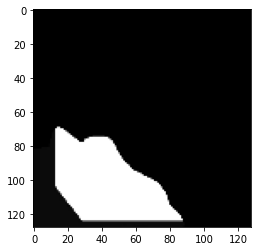

In [ ]:
plt.imshow(new_train_y[0])

In [ ]:
new_train_y[0]

array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[11, 11, 11],
        [11, 11, 11],
        [11, 11, 11],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[11, 11, 11],
        [11, 11, 11],
        [11, 11, 11],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[11, 11, 11],
        [11, 11, 11],
        [11, 11, 11],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)